<a href="https://colab.research.google.com/github/wambui-nduta/nduts/blob/main/Data_Visualization_Python_(checkpoint).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Africa_climate_change.csv')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     464815 non-null  object 
 1   PRCP     177575 non-null  float64
 2   TAVG     458439 non-null  float64
 3   TMAX     363901 non-null  float64
 4   TMIN     332757 non-null  float64
 5   COUNTRY  464815 non-null  object 
dtypes: float64(4), object(2)
memory usage: 21.3+ MB


In [11]:
df.describe()

,PRCP,TAVG,TMAX,TMIN
count,177575.000000,458439.000000,363901.000000,332757.000000
mean,0.120941,77.029838,88.713969,65.548262
std,0.486208,11.523634,13.042631,11.536547
min,0.000000,-49.000000,41.000000,12.000000
25%,0.000000,70.000000,81.000000,58.000000
50%,0.000000,80.000000,90.000000,68.000000
75%,0.010000,85.000000,99.000000,74.000000
max,19.690000,110.000000,123.000000,97.000000


In [46]:
df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon


In [13]:
df.isnull().sum()

,0
DATE,0
PRCP,287240
TAVG,6376
TMAX,100914
TMIN,132058
COUNTRY,0


In [17]:
#checking date formart of the date on the file is y,m,d...its already determined

print(df["DATE"].head(10))


0   1980-01-01
1   1980-01-01
2   1980-01-01
3   1980-01-01
4   1980-01-01
5   1980-01-01
6   1980-01-01
7   1980-01-01
8   1980-01-01
9   1980-01-01
Name: DATE, dtype: datetime64[ns]


In [21]:
#fill in missing values
df["PRCP"] = df["PRCP"].fillna(0)
df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,1980-01-01,0.0,54.0,61.0,43.0,Tunisia
1,1980-01-01,0.0,49.0,55.0,41.0,Tunisia
2,1980-01-01,0.0,72.0,86.0,59.0,Cameroon
3,1980-01-01,0.0,50.0,55.0,43.0,Tunisia
4,1980-01-01,0.0,75.0,91.0,NaN,Cameroon


In [29]:
#for country in df["COUNTRY"].unique():
    #mean_value = df.loc[df["COUNTRY"] == country, "TAVG"].mean()
    #df.loc[(df["COUNTRY"] == country) & (df["TAVG"].isnull()), "TAVG"] = mean_value
#df.head()

#or
df["TAVG"] = df.groupby("COUNTRY")["TAVG"].transform(lambda x: x.fillna(x.mean()))

df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,1980-01-01,0.0,54.0,61.0,43.0,Tunisia
1,1980-01-01,0.0,49.0,55.0,41.0,Tunisia
2,1980-01-01,0.0,72.0,86.0,59.0,Cameroon
3,1980-01-01,0.0,50.0,55.0,43.0,Tunisia
4,1980-01-01,0.0,75.0,91.0,NaN,Cameroon


In [31]:
# Fill TMAX  with the mean per country
df["TMAX"] = df.groupby("COUNTRY")["TMAX"].transform(lambda x: x.fillna(x.mean()))

df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,1980-01-01,0.0,54.0,61.0,43.0,Tunisia
1,1980-01-01,0.0,49.0,55.0,41.0,Tunisia
2,1980-01-01,0.0,72.0,86.0,59.0,Cameroon
3,1980-01-01,0.0,50.0,55.0,43.0,Tunisia
4,1980-01-01,0.0,75.0,91.0,NaN,Cameroon


In [32]:


# Fill TMIN  with the mean per country
df["TMIN"] = df.groupby("COUNTRY")["TMIN"].transform(lambda x: x.fillna(x.mean()))
df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,1980-01-01,0.0,54.0,61.0,43.000000,Tunisia
1,1980-01-01,0.0,49.0,55.0,41.000000,Tunisia
2,1980-01-01,0.0,72.0,86.0,59.000000,Cameroon
3,1980-01-01,0.0,50.0,55.0,43.000000,Tunisia
4,1980-01-01,0.0,75.0,91.0,69.267707,Cameroon


In [34]:
df.describe()

df.isnull().sum()

,0
DATE,0
PRCP,0
TAVG,0
TMAX,0
TMIN,0
COUNTRY,0


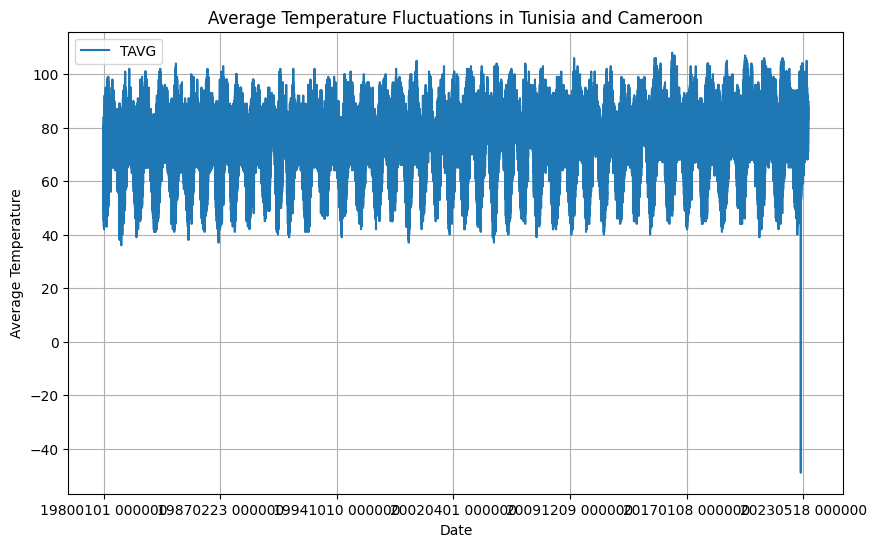

In [48]:
#Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon. Interpret the results
df_filtered = df[(df['COUNTRY'] == 'Tunisia') | (df['COUNTRY'] == 'Cameroon')]

df_filtered.plot(kind ='line',x = 'DATE' ,y = 'TAVG', figsize=(10, 6))
plt.title('Average Temperature Fluctuations in Tunisia and Cameroon')
plt.xlabel('Date')
plt.ylabel('Average Temperature')

plt.grid(True)  #grid for readability
plt.show()

ValueError: time data "19800101 000000" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

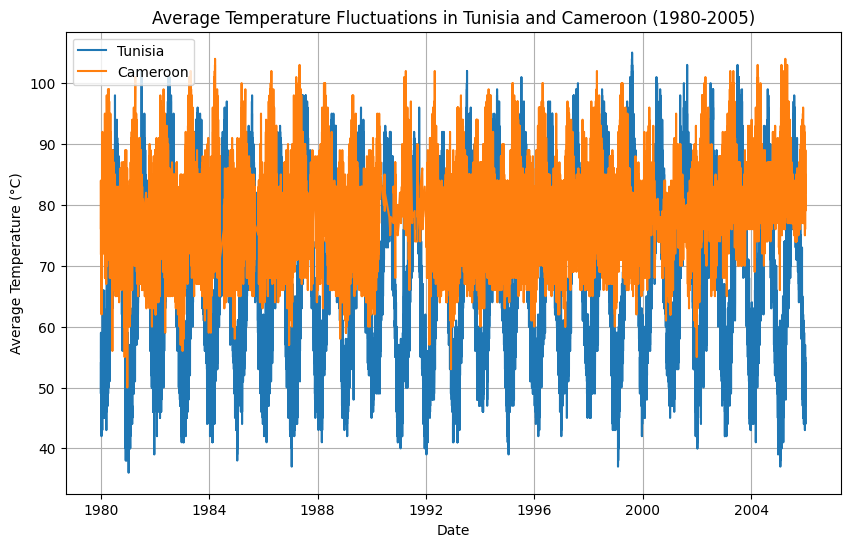

In [54]:



# Filter for Tunisia & Cameroon between 1980 and 2005
df['DATE'] = pd.to_datetime(df['DATE'])
df_filtered = df[
    ((df['COUNTRY'] == 'Tunisia') | (df['COUNTRY'] == 'Cameroon')) &
    (df["DATE"].between("1980-01-01", "2005-12-31"))
]

# Plot
plt.figure(figsize=(10, 6))
for country in ['Tunisia', 'Cameroon']:
    subset = df_filtered[df_filtered["COUNTRY"] == country]
    plt.plot(subset["DATE"], subset["TAVG"], label=country)

# Customize chart
plt.title('Average Temperature Fluctuations in Tunisia and Cameroon (1980-2005)')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)  # Improves readability

# Show plot
plt.show()


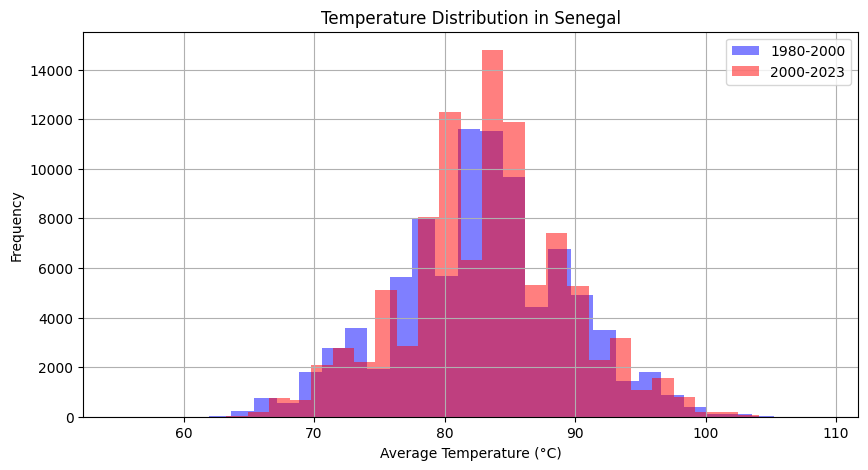

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert DATE column to datetime
df["DATE"] = pd.to_datetime(df["DATE"])

# Filter Senegal data for the two periods
senegal_80_00 = df[(df['COUNTRY'] == 'Senegal') & (df["DATE"] >= "1980-01-01") & (df["DATE"] <= "2000-12-31")]
senegal_00_23 = df[(df['COUNTRY'] == 'Senegal') & (df["DATE"] >= "2000-01-01") & (df["DATE"] <= "2023-12-31")]

# Plot histograms
plt.figure(figsize=(10, 5))
plt.hist(senegal_80_00["TAVG"], bins=30, alpha=0.5, label="1980-2000", color="blue")
plt.hist(senegal_00_23["TAVG"], bins=30, alpha=0.5, label="2000-2023", color="red")

# Labels and legend
plt.title("Temperature Distribution in Senegal")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)  # Improves readability

# Show plot
plt.show()


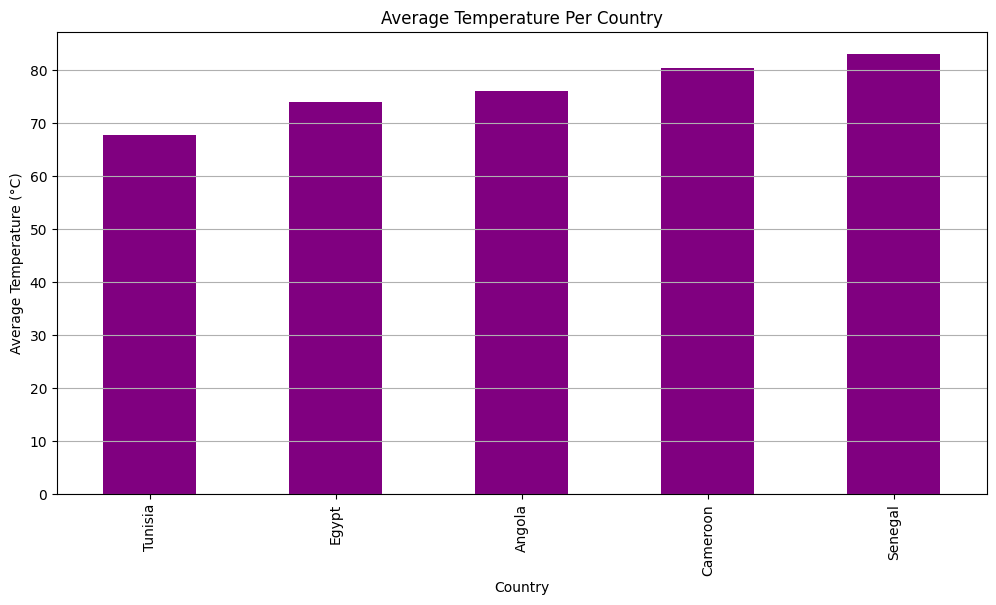

In [59]:


# Group by country and calculate the mean temperature
avg_temp_per_country = df.groupby("COUNTRY")["TAVG"].mean().sort_values()

# Plot
plt.figure(figsize=(12, 6))
avg_temp_per_country.plot(kind="bar", color="purple")

# Labels and Title
plt.xlabel("Country")
plt.ylabel("Average Temperature (°C)")
plt.title("Average Temperature Per Country")
plt.xticks(rotation=90)  # Rotate country names for readability
plt.grid(axis="y")

plt.show()



<ipython-input-61-a2bc40e561b8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="COUNTRY", y="TAVG", data=df, palette="dark")


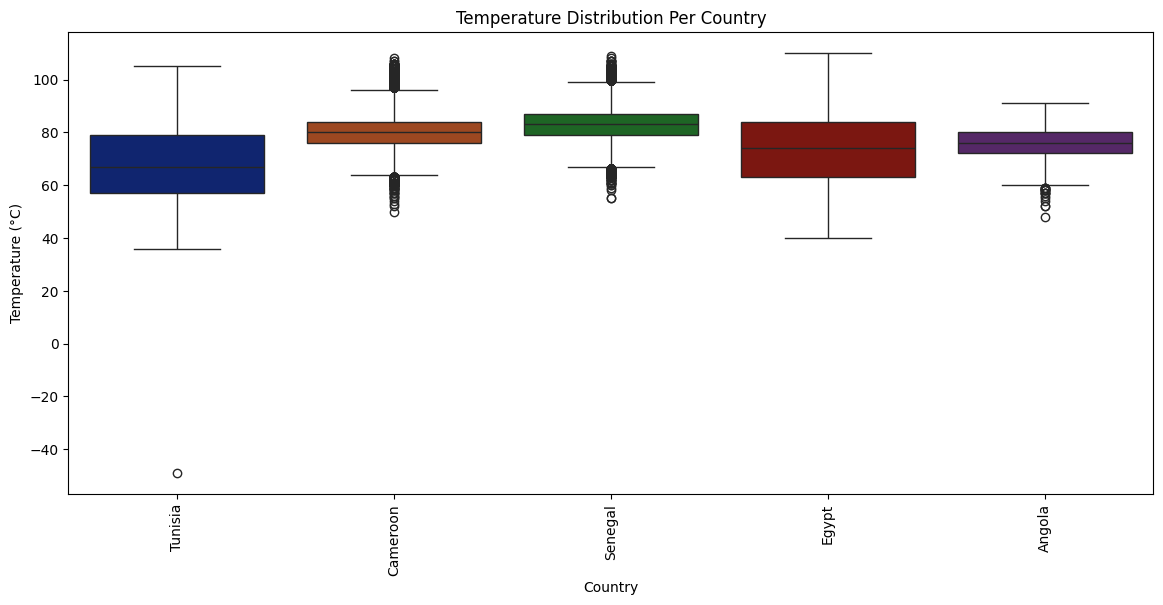

In [61]:
#or this option If you want to see temperature distribution per country, a box plot is a great choice. It shows:
#Median Temperature
# Variation (Spread of Data)
# Outliers (Extreme Temperatures

import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(x="COUNTRY", y="TAVG", data=df, palette="dark")

plt.xlabel("Country")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Distribution Per Country")
plt.xticks(rotation=90)  # Rotate for readability

plt.show()




In [62]:
print(df["COUNTRY"].unique())

['Tunisia' 'Cameroon' 'Senegal' 'Egypt' 'Angola']


<ipython-input-64-77bf85e086b8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="COUNTRY", y="PRCP", data=df, palette="dark")


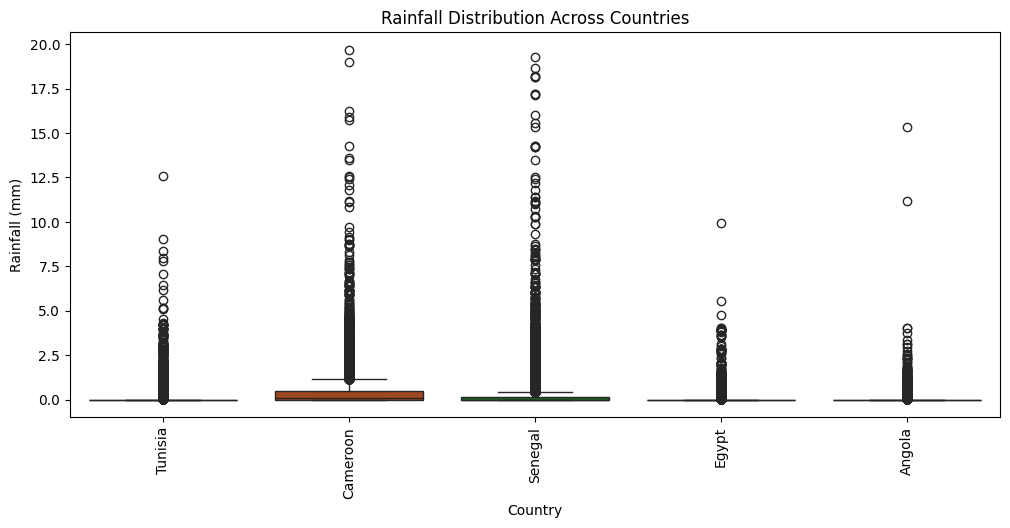

In [64]:
# myQuestion: How does rainfall (PRCP) vary across countries?

import seaborn as sns

plt.figure(figsize=(12, 5))
sns.boxplot(x="COUNTRY", y="PRCP", data=df, palette="dark")

# Labels and Title
plt.xlabel("Country")
plt.ylabel("Rainfall (mm)")
plt.title("Rainfall Distribution Across Countries")
plt.xticks(rotation=90)

plt.show()

